<a href="https://colab.research.google.com/github/majorquev/DBDC_202309_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/C6/Clase6_2_reglas_de_asociacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 4: Reglas de asociación


**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales<br>
**E-mail ayudante:** rumorale1@gmail.com

Las reglas de asociación nos permiten identificar relaciones entre variables a través de grandes datasets. Es posible cuantificar que tan "fuerte" es la relación obtenida mediante diversas métricas de interés, entre las cuales se destacan el _lift_, _support_ y _confidence_ de una regla.

Para más detalles sobre la definición y algoritmo de generación de las reglas refiérase a la presentación de la clase 7 de este curso.




In [1]:
#install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(arules)
library(dplyr)
data(Groceries)
class(Groceries)



[1] "transactions"
attr(,"package")
[1] "arules"

In [5]:
Groceries

transactions in sparse format with
 9835 transactions (rows) and
 169 items (columns)

In [6]:
inspect(head(Groceries, 20))

     items                      
[1]  {citrus fruit,             
      semi-finished bread,      
      margarine,                
      ready soups}              
[2]  {tropical fruit,           
      yogurt,                   
      coffee}                   
[3]  {whole milk}               
[4]  {pip fruit,                
      yogurt,                   
      cream cheese ,            
      meat spreads}             
[5]  {other vegetables,         
      whole milk,               
      condensed milk,           
      long life bakery product} 
[6]  {whole milk,               
      butter,                   
      yogurt,                   
      rice,                     
      abrasive cleaner}         
[7]  {rolls/buns}               
[8]  {other vegetables,         
      UHT-milk,                 
      rolls/buns,               
      bottled beer,             
      liquor (appetizer)}       
[9]  {pot plants}               
[10] {whole milk,               
      cere

In [ ]:
Groceries

In [ ]:
?transactions

In [7]:
 # Numero de items por observación mediante comndo size
size(head(Groceries,6))

[1] 4 3 1 4 4 5

In [8]:
items_boleta <- size(Groceries)

In [9]:
mean(items_boleta)

[1] 4.409456

In [11]:
max(items_boleta)
min(items_boleta)

[1] 32

[1] 1

In [12]:
 #LIST convierte las trasacciones a una lista (con mayusculas)
lista <- LIST(head(Groceries,20))

In [13]:
lista
class(lista)
str(lista)

[[1]]
[1] "citrus fruit"        "semi-finished bread" "margarine"          
[4] "ready soups"        

[[2]]
[1] "tropical fruit" "yogurt"         "coffee"        

[[3]]
[1] "whole milk"

[[4]]
[1] "pip fruit"     "yogurt"        "cream cheese " "meat spreads" 

[[5]]
[1] "other vegetables"         "whole milk"              
[3] "condensed milk"           "long life bakery product"

[[6]]
[1] "whole milk"       "butter"           "yogurt"           "rice"            
[5] "abrasive cleaner"

[[7]]
[1] "rolls/buns"

[[8]]
[1] "other vegetables"   "UHT-milk"           "rolls/buns"        
[4] "bottled beer"       "liquor (appetizer)"

[[9]]
[1] "pot plants"

[[10]]
[1] "whole milk" "cereals"   

[[11]]
[1] "tropical fruit"   "other vegetables" "white bread"      "bottled water"   
[5] "chocolate"       

[[12]]
[1] "citrus fruit"   "tropical fruit" "whole milk"     "butter"        
[5] "curd"           "yogurt"         "flour"          "bottled water" 
[9] "dishes"        

[[13]]
[1] "beef"

[[14]]
[1] "frankfurter" "rolls/buns"  "soda"       

[[15]]
[1] "chicken"        "tropical fruit"

[[16]]
[1] "butter"                "sugar"                 "fruit/vegetable juice"
[4] "newspapers"           

[[17]]
[1] "fruit/vegetable juice"

[[18]]
[1] "packaged fruit/vegetables"

[[19]]
[1] "chocolate"

[[20]]
[1] "specialty bar"

[1] "list"

List of 20
 $ : chr [1:4] "citrus fruit" "semi-finished bread" "margarine" "ready soups"
 $ : chr [1:3] "tropical fruit" "yogurt" "coffee"
 $ : chr "whole milk"
 $ : chr [1:4] "pip fruit" "yogurt" "cream cheese " "meat spreads"
 $ : chr [1:4] "other vegetables" "whole milk" "condensed milk" "long life bakery product"
 $ : chr [1:5] "whole milk" "butter" "yogurt" "rice" ...
 $ : chr "rolls/buns"
 $ : chr [1:5] "other vegetables" "UHT-milk" "rolls/buns" "bottled beer" ...
 $ : chr "pot plants"
 $ : chr [1:2] "whole milk" "cereals"
 $ : chr [1:5] "tropical fruit" "other vegetables" "white bread" "bottled water" ...
 $ : chr [1:9] "citrus fruit" "tropical fruit" "whole milk" "butter" ...
 $ : chr "beef"
 $ : chr [1:3] "frankfurter" "rolls/buns" "soda"
 $ : chr [1:2] "chicken" "tropical fruit"
 $ : chr [1:4] "butter" "sugar" "fruit/vegetable juice" "newspapers"
 $ : chr "fruit/vegetable juice"
 $ : chr "packaged fruit/vegetables"
 $ : chr "chocolate"
 $ : chr "specialty bar"


In [14]:
class(Groceries)

[1] "transactions"
attr(,"package")
[1] "arules"

In [17]:
# Con eclat podemos determinar los itemsets frecuentes dado un support mínimo
frequentItems <- eclat(Groceries,
                       parameter = list(supp = 0.07)
                       ) # se calcula el support para items frecuentes

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE    0.07      1     10 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 688 

create itemset ... 
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [18 item(s)] done [0.00s].
creating sparse bit matrix ... [18 row(s), 9835 column(s)] done [0.00s].
writing  ... [19 set(s)] done [0.00s].
Creating S4 object  ... done [0.00s].


In [18]:
inspect(frequentItems)

     items                          support    count
[1]  {other vegetables, whole milk} 0.07483477  736 
[2]  {whole milk}                   0.25551601 2513 
[3]  {other vegetables}             0.19349263 1903 
[4]  {rolls/buns}                   0.18393493 1809 
[5]  {yogurt}                       0.13950178 1372 
[6]  {soda}                         0.17437722 1715 
[7]  {root vegetables}              0.10899847 1072 
[8]  {tropical fruit}               0.10493137 1032 
[9]  {bottled water}                0.11052364 1087 
[10] {sausage}                      0.09395018  924 
[11] {shopping bags}                0.09852567  969 
[12] {citrus fruit}                 0.08276563  814 
[13] {pastry}                       0.08896797  875 
[14] {pip fruit}                    0.07564820  744 
[15] {whipped/sour cream}           0.07168277  705 
[16] {fruit/vegetable juice}        0.07229283  711 
[17] {newspapers}                   0.07981698  785 
[18] {bottled beer}                 0.08052872

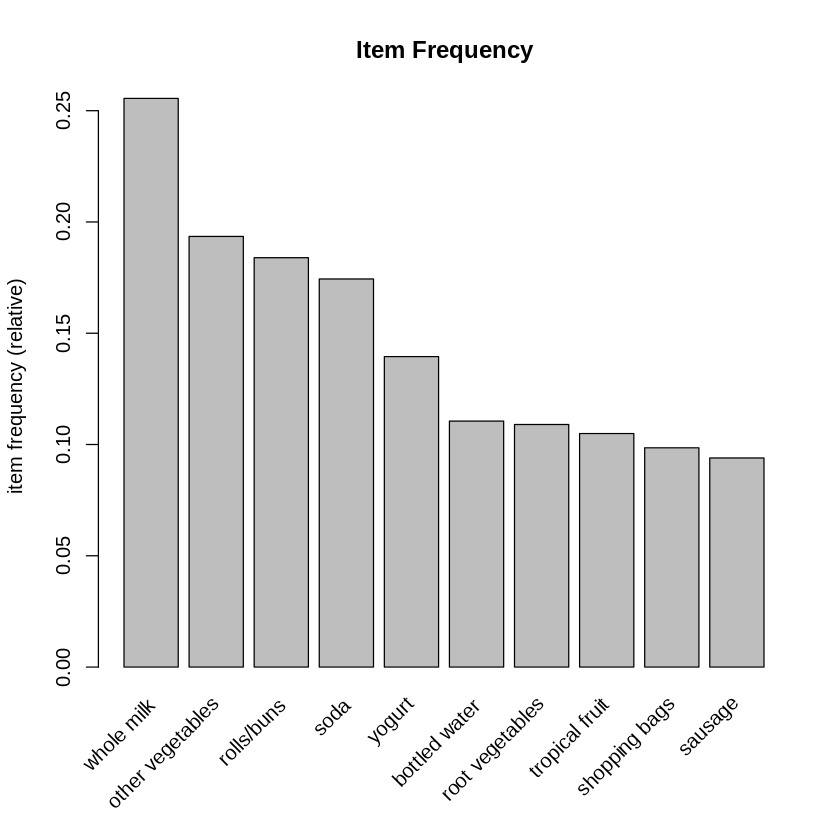

In [22]:
itemFrequencyPlot(Groceries,
                  topN=10,
                  type="relative",
                  main="Item Frequency") #podemos graficar los items frecuentes

In [19]:
?itemFrequencyPlot

## ¿Cómo determinamos las reglas?

In [24]:
rules <- apriori(data = Groceries, #debe ser del tipo "transactions"
                 parameter = list(supp=0.01, conf = 0.08),
                )
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.08    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 98 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [88 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [472 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 472 rules 

In [23]:
?apriori

In [26]:
length(rules)
inspect(rules)

[1] 472

      lhs                           rhs                        support confidence   coverage      lift count
[1]   {}                         => {bottled beer}          0.08052872 0.08052872 1.00000000 1.0000000   792
[2]   {}                         => {pastry}                0.08896797 0.08896797 1.00000000 1.0000000   875
[3]   {}                         => {citrus fruit}          0.08276563 0.08276563 1.00000000 1.0000000   814
[4]   {}                         => {shopping bags}         0.09852567 0.09852567 1.00000000 1.0000000   969
[5]   {}                         => {sausage}               0.09395018 0.09395018 1.00000000 1.0000000   924
[6]   {}                         => {bottled water}         0.11052364 0.11052364 1.00000000 1.0000000  1087
[7]   {}                         => {tropical fruit}        0.10493137 0.10493137 1.00000000 1.0000000  1032
[8]   {}                         => {root vegetables}       0.10899847 0.10899847 1.00000000 1.0000000  1072
[9]   {}           

In [29]:
## Y si queremos buscar con qué combinar un producto determinado, por ejemplo leche
rules <- apriori( data = Groceries,
                  parameter =list (supp=0.05, conf = 0.1, minlen = 2),
                  #appearance = list(default="rhs", lhs ="whole milk"),
                  control = list (verbose=F))

class(rules)
rules

[1] "rules"
attr(,"package")
[1] "arules"

set of 6 rules 

In [30]:
inspect(rules)

    lhs                   rhs                support    confidence coverage 
[1] {yogurt}           => {whole milk}       0.05602440 0.4016035  0.1395018
[2] {whole milk}       => {yogurt}           0.05602440 0.2192598  0.2555160
[3] {rolls/buns}       => {whole milk}       0.05663447 0.3079049  0.1839349
[4] {whole milk}       => {rolls/buns}       0.05663447 0.2216474  0.2555160
[5] {other vegetables} => {whole milk}       0.07483477 0.3867578  0.1934926
[6] {whole milk}       => {other vegetables} 0.07483477 0.2928770  0.2555160
    lift     count
[1] 1.571735 551  
[2] 1.571735 551  
[3] 1.205032 557  
[4] 1.205032 557  
[5] 1.513634 736  
[6] 1.513634 736  


In [38]:
## Y si queremos buscar con qué combinar un producto determinado, por ejemplo leche
rules_yogurt <- apriori( data = Groceries,
                  parameter = list (supp=0.02, conf = 0.21, minlen = 2),
                  appearance = list(default="lhs", rhs ="yogurt"),
                  control = list (verbose=F))

class(rules)
rules_yogurt

[1] "rules"
attr(,"package")
[1] "arules"

set of 7 rules 

In [39]:
inspect(rules_yogurt)

    lhs                               rhs      support    confidence coverage  
[1] {whipped/sour cream}           => {yogurt} 0.02074225 0.2893617  0.07168277
[2] {citrus fruit}                 => {yogurt} 0.02165735 0.2616708  0.08276563
[3] {tropical fruit}               => {yogurt} 0.02928317 0.2790698  0.10493137
[4] {root vegetables}              => {yogurt} 0.02582613 0.2369403  0.10899847
[5] {other vegetables}             => {yogurt} 0.04341637 0.2243826  0.19349263
[6] {whole milk}                   => {yogurt} 0.05602440 0.2192598  0.25551601
[7] {other vegetables, whole milk} => {yogurt} 0.02226741 0.2975543  0.07483477
    lift     count
[1] 2.074251 204  
[2] 1.875752 213  
[3] 2.000475 288  
[4] 1.698475 254  
[5] 1.608457 427  
[6] 1.571735 551  
[7] 2.132979 219  


In [45]:
rules_conf <- sort(rules_yogurt,
                   by="lift",
                   decreasing=TRUE) # ordenando por confidence rules.

In [44]:

inspect(rules_conf)

    lhs                               rhs      support    confidence coverage  
[1] {other vegetables, whole milk} => {yogurt} 0.02226741 0.2975543  0.07483477
[2] {whipped/sour cream}           => {yogurt} 0.02074225 0.2893617  0.07168277
[3] {tropical fruit}               => {yogurt} 0.02928317 0.2790698  0.10493137
[4] {citrus fruit}                 => {yogurt} 0.02165735 0.2616708  0.08276563
[5] {root vegetables}              => {yogurt} 0.02582613 0.2369403  0.10899847
[6] {other vegetables}             => {yogurt} 0.04341637 0.2243826  0.19349263
[7] {whole milk}                   => {yogurt} 0.05602440 0.2192598  0.25551601
    lift     count
[1] 2.132979 219  
[2] 2.074251 204  
[3] 2.000475 288  
[4] 1.875752 213  
[5] 1.698475 254  
[6] 1.608457 427  
[7] 1.571735 551  


## Transformación a objetos de clase transaction





In [ ]:
 ?transactions

In [46]:
## Example 4: creating transactions from a data.frame with
## transaction IDs and items (long format)
a_df3 <- data.frame(
  TID =  c( 1,   1,   2,   2,   2,   3 ),
  item = c("a", "b", "a", "b", "c", "b")
)
a_df3
trans4 <- transactions(a_df3, format = "long", cols = c("TID", "item"))
trans4
inspect(trans4)

## convert transactions back into long format.
toLongFormat(trans4)


TID,item
<dbl>,<chr>
1,a
1,b
2,a
2,b
2,c
3,b


transactions in sparse format with
 3 transactions (rows) and
 3 items (columns)

    items     transactionID
[1] {a, b}    1            
[2] {a, b, c} 2            
[3] {b}       3            


TID,item
<int>,<fct>
1,a
1,b
2,a
2,b
2,c
3,b
